# Debug: `Buzzard.ini`

In [1]:
#!/usr/bin/env python
import os, fitsio

import sys
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

In [2]:
import matplotlib
matplotlib.rc('xtick', labelsize=20, top=True, direction='in')
matplotlib.rc('ytick', labelsize=20, right=True, direction='in')
matplotlib.rc('axes', linewidth=1, labelsize=20)
matplotlib.rc('xtick.major', size=5)
#matplotlib.rc('xtick.minor', size=5)
matplotlib.rc('ytick.major', size=5)
#matplotlib.rc('ytick.minor', size=5)

## Load Files

In [7]:
path = '/global/common/software/des/jesteves/y3_cluster_cpp/y3_buzzard/datablock_0/'
print(path)

/global/common/software/des/jesteves/y3_cluster_cpp/y3_buzzard/datablock_0/


In [8]:
def get_block(model,col):
    return np.genfromtxt(path+'%s/%s.txt'%(model.lower(), col))

In [9]:
!ls /global/common/software/des/jesteves/y3_cluster_cpp/y3_buzzard/datablock_0/

cdm_baryon_power_lin  cosmological_parameters  matter_power_lin  priors
cdm_baryon_power_nl   distances		       matter_power_nl	 recfast
cluster_abundance     growth_parameters        mstar		 shear
cmb_cl		      kappa		       numbercounts	 sigmacritinv
correlationfunction   mass_function	       pkdamp


### Radius bins

In [10]:
radius = np.round(np.logspace(np.log10(0.05), np.log10(15), 30),2)
radius

array([ 0.05,  0.06,  0.07,  0.09,  0.11,  0.13,  0.16,  0.2 ,  0.24,
        0.29,  0.36,  0.44,  0.53,  0.64,  0.78,  0.96,  1.16,  1.42,
        1.72,  2.1 ,  2.55,  3.11,  3.79,  4.61,  5.61,  6.83,  8.31,
       10.12, 12.32, 15.  ])

In [11]:
wall_numbers = " ".join(map(str,radius))
wall_numbers

'0.05 0.06 0.07 0.09 0.11 0.13 0.16 0.2 0.24 0.29 0.36 0.44 0.53 0.64 0.78 0.96 1.16 1.42 1.72 2.1 2.55 3.11 3.79 4.61 5.61 6.83 8.31 10.12 12.32 15.0'

In [12]:
radius3 = np.tile(radius,3)
wall_numbers = " ".join(map(str, list(radius3)))
wall_numbers

'0.05 0.06 0.07 0.09 0.11 0.13 0.16 0.2 0.24 0.29 0.36 0.44 0.53 0.64 0.78 0.96 1.16 1.42 1.72 2.1 2.55 3.11 3.79 4.61 5.61 6.83 8.31 10.12 12.32 15.0 0.05 0.06 0.07 0.09 0.11 0.13 0.16 0.2 0.24 0.29 0.36 0.44 0.53 0.64 0.78 0.96 1.16 1.42 1.72 2.1 2.55 3.11 3.79 4.61 5.61 6.83 8.31 10.12 12.32 15.0 0.05 0.06 0.07 0.09 0.11 0.13 0.16 0.2 0.24 0.29 0.36 0.44 0.53 0.64 0.78 0.96 1.16 1.42 1.72 2.1 2.55 3.11 3.79 4.61 5.61 6.83 8.31 10.12 12.32 15.0'

In [13]:
z_wall = np.repeat([0.2, 0.373, 0.51],30)
z_wall_numbers = " ".join(map(str, list(z_wall)))
z_wall_numbers

'0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.373 0.373 0.373 0.373 0.373 0.373 0.373 0.373 0.373 0.373 0.373 0.373 0.373 0.373 0.373 0.373 0.373 0.373 0.373 0.373 0.373 0.373 0.373 0.373 0.373 0.373 0.373 0.373 0.373 0.373 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51'

In [14]:
z_wall = np.repeat([0.32, 0.51, 0.64],30)
z_wall_numbers = " ".join(map(str, list(z_wall)))
z_wall_numbers

'0.32 0.32 0.32 0.32 0.32 0.32 0.32 0.32 0.32 0.32 0.32 0.32 0.32 0.32 0.32 0.32 0.32 0.32 0.32 0.32 0.32 0.32 0.32 0.32 0.32 0.32 0.32 0.32 0.32 0.32 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.64 0.64 0.64 0.64 0.64 0.64 0.64 0.64 0.64 0.64 0.64 0.64 0.64 0.64 0.64 0.64 0.64 0.64 0.64 0.64 0.64 0.64 0.64 0.64 0.64 0.64 0.64 0.64 0.64 0.64'

## Plot Profiles

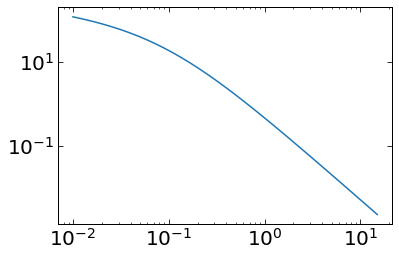

In [15]:
rsigma = get_block("correlationfunction", "r_sigma") 
sigma = get_block("correlationfunction", "sigma_nfw") 
plt.loglog()
plt.plot(rsigma, sigma[11])

## Kappa

In [16]:
kappa = get_block("kappa", "vals")
kappa = kappa.reshape(12, 30)

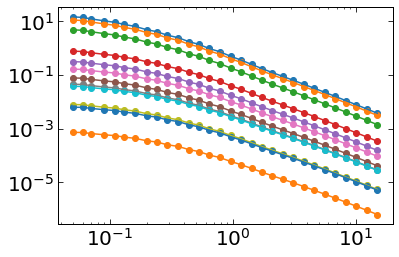

In [17]:
plt.loglog()
# plt.xscale('log')
for i in range(12):
    p = plt.plot(radius, kappa[i])
    plt.scatter(radius, kappa[i], color=p[0].get_color())

In [18]:
from scipy import integrate

def compute_mean_profile(r, fx, rmin=0.1):
    """Computes \Delta f(x) = <f(<x)> - f(x)
    
    Average profiles excess of f(x) 
    Example: f(x) = \Sigma
    """
    # start the integration
    profile = interp1d(r, fx, fill_value='extrapolate')
    
    delta_profile = np.full(r.size, np.nan)
    for ii, ri in enumerate(r):
        if ri>rmin:
            #delta_profile[ii] = integrate.quad(profile, 0.001, ri)[0]/ri - profile(ri)
            delta_profile[ii] = integrate.simps(fx[r<=ri], x=r[r<=ri])/ri - profile(ri)
    return delta_profile

In [19]:
compute_mean_profile(radius, kappa[0])

array([        nan,         nan,         nan,         nan, -2.83357796,
       -1.0270995 ,  0.2364479 ,  1.66443368,  2.01286045,  2.64743758,
        2.66574828,  2.84788166,  2.66307557,  2.60029234,  2.32411162,
        2.12306066,  1.86476274,  1.63803711,  1.41048321,  1.20959548,
        1.0209594 ,  0.8650272 ,  0.72227853,  0.60917077,  0.50621395,
        0.42416603,  0.35106516,  0.29282939,  0.24140816,  0.20082482])

In [20]:
radius

array([ 0.05,  0.06,  0.07,  0.09,  0.11,  0.13,  0.16,  0.2 ,  0.24,
        0.29,  0.36,  0.44,  0.53,  0.64,  0.78,  0.96,  1.16,  1.42,
        1.72,  2.1 ,  2.55,  3.11,  3.79,  4.61,  5.61,  6.83,  8.31,
       10.12, 12.32, 15.  ])

In [21]:
shear = get_block("shear", "shear_cen")
rshear = get_block("shear", "r")
tshear = get_block("shear", "theta")
shear.shape
# kappa = kappa.reshape(12, 10)

(12, 100)

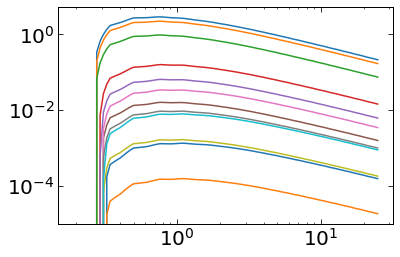

In [22]:
plt.loglog()
# plt.xscale('log')
for i in range(12):
    p = plt.plot(rshear, shear[i])
    #plt.scatter(radius, compute_mean_profile(radius, kappa[i]),color=p[0].get_color())

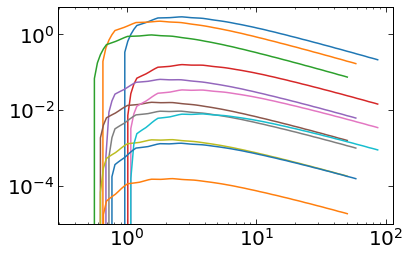

In [23]:
plt.loglog()
# plt.xscale('log')
for i in range(12):
    p = plt.plot(tshear[i], shear[i])
    #plt.scatter(radius, compute_mean_profile(radius, kappa[i]),color=p[0].get_color())

In [24]:
kw = {'dS':r'$\Delta \Sigma \, \, [M_{\odot}]$',
      'gamma': r'$\left< \gamma_t(\theta) \right>$',
      'physical':r'$\rm R_p\ [Mpc]$',
      'angle': r'$\theta \; [arcmin]$'
     }

def plot_profile(x,px,ax=None,xcol='physical',**kwargs):
    if ax is None: ax = plt.gca()
    ax.loglog()
    ax.plot(x,px,**kwargs)
    ax.set_xlabel(kw[xcol])
    

In [37]:
lbdbins =  np.array([5, 15, 25, 40, 160])
lam_low = lbdbins[:-1]
lam_hig = lbdbins[1:]

zmin_list = np.array([0.2, 0.373, 0.51])
zmax_list = np.array([0.32, 0.51, 0.64])

In [40]:
labels = {'lam': [r'$%i < \lambda < %i$'%(llow, lhig) for llow, lhig in zip(lam_low, lam_hig)],
          'z': [r'$%.2f < z < %.2f$'%(zl, zh) for zl, zh in zip(zmin_list, zmax_list)]}

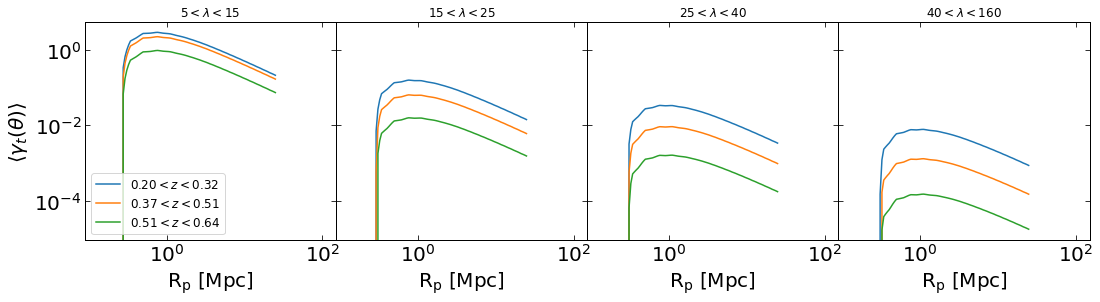

In [41]:
theta = tshear.reshape(4, 3, 100)
gt_stack = shear.reshape(4, 3, 100)

fig, axes = plt.subplots(1, 4, sharex=True, sharey=True, figsize=(4*4+2, 4), gridspec_kw = {'wspace':0, 'hspace':0})

for i in range(4):
        ax = axes[i]
        label = None
        for j in range(3):
            if i==0: label=labels['z'][j]
            #plot_profile(theta[i][j], gt_stack[i][j],ax=ax,xcol='angle',label=label)
            plot_profile(rshear, gt_stack[i][j],ax=ax,label=label)
        ax.set_title(labels['lam'][i])
axes[0].set_xlim(9e-2, 1.5e2)
axes[0].set_ylabel(kw['gamma'])
axes[0].legend(fontsize=12,loc=3)
# fig.suptitle('Stacked Profiles in Angle Units')

In [14]:
!ls /global/common/software/des/jesteves/y3_cluster_cpp/y3_buzzard/datablock_0/growth_parameters

a.txt	 da.txt    f_z.txt	 h.txt	    sigma_8.txt
d_z.txt  f_ap.txt  fsigma_8.txt  rs_dv.txt  z.txt


In [8]:
## Hubble evolution
z = np.genfromtxt(path+'growth_parameters/z.txt')
hz = np.genfromtxt(path+'growth_parameters/h.txt')

/tmp/ipykernel_30397/685748946.py:2: RuntimeWarning: invalid value encountered in sqrt
  plt.plot(z, hz[0]*np.sqrt(1-0.3*(1+z)**3))


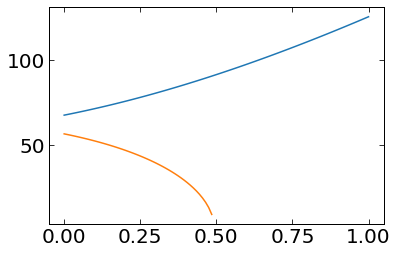

In [16]:
plt.plot(z, hz)
plt.plot(z, hz[0]*np.sqrt(1-0.3*(1+z)**3))

### Debug Sigma Crit Inv

In [40]:
!ls /global/common/software/des/jesteves/y3_cluster_cpp/y3_buzzard/datablock_0/correlationfunction/

bias.txt	  k.txt    r_sigma.txt	    sigma_hh.txt   xi_nfw.txt
damped_pk_hh.txt  lnm.txt  r_xi.txt	    sigma_nfw.txt  z.txt
hubble_shift.txt  m_h.txt  scale_shift.txt  xi_hh.txt


In [122]:
r = np.genfromtxt(path+'sigmacritinv/r_sigma.txt')
sigC = np.genfromtxt(path+'sigmacritinv/sigma_crit_inv.txt')
sigC[11,:10]
# plt.plot(r, sigC)

array([0.00017924, 0.00017924, 0.00017924, 0.00017924, 0.00017924,
       0.00017924, 0.00017924, 0.00017924, 0.00017924, 0.00017924])